# Tag Processing

In [88]:
import pandas as pd
import numpy as np
import gzip
path= 'C:\\Users\\lmj35\\Desktop\\벌쿠형 플젝\\riiid-test-answer-prediction\\feather\\riiid_train.feather'

### 결측 row 제거

In [124]:
q_data = pd.read_csv('C:\\Users\\lmj35\\Desktop\\벌쿠형 플젝\\riiid-test-answer-prediction\\questions.csv')
# 결측값 존재 row 찾기
q_data[q_data['tags'].isnull()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [125]:
# 결측 row 제거
q_data.dropna(inplace=True)
q_data.reset_index(drop=True, inplace=True)
q_data

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13517,13518,13518,3,5,14
13518,13519,13519,3,5,8
13519,13520,13520,2,5,73
13520,13521,13521,0,5,125


In [126]:
# tags -> list
for i in range(len(q_data)):
    q_data['tags'][i] = sorted(map(int,(q_data['tags'][i].split())))
    
# tags count
q_data['tags_num'] = [0]*len(q_data)
for i in range(len(q_data)):
    q_data['tags_num'][i] = len(q_data['tags'][i])
    
q_data

C:\Users\lmj35\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lmj35\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,question_id,bundle_id,correct_answer,part,tags,tags_num
0,0,0,0,1,"[38, 51, 131, 162]",4
1,1,1,1,1,"[36, 81, 131]",3
2,2,2,0,1,"[92, 101, 131, 162]",4
3,3,3,0,1,"[29, 131, 149, 162]",4
4,4,4,3,1,"[5, 38, 131, 162]",4
...,...,...,...,...,...,...
13517,13518,13518,3,5,[14],1
13518,13519,13519,3,5,[8],1
13519,13520,13520,2,5,[73],1
13520,13521,13521,0,5,[125],1


In [128]:
# 태그 최대값 찾기
count = 0
for i in range(len(q_data)):
    for j in range(len(q_data['tags'][i])):
        if count <= q_data['tags'][i][j]:
            count = q_data['tags'][i][j]
print(count)

187


## 1) Tag Clustering by K-Means using Multi-hot-encoding

In [129]:
# tags -> multi-hot-encoding
import copy
lst_ = [0]*(count+1)
new_tags = []

for i in range(len(q_data)):
    tag_lst = copy.deepcopy(lst_)
    for j in q_data['tags'][i]:
        if j != -1:
            tag_lst[j] = 1
    new_tags.append(tag_lst)
q_data['new_tags']=new_tags

q_data.head()

,question_id,bundle_id,correct_answer,part,tags,tags_num,new_tags
0,0,0,0,1,"[38, 51, 131, 162]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,1,1,1,"[36, 81, 131]",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,2,0,1,"[92, 101, 131, 162]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,3,0,1,"[29, 131, 149, 162]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,4,3,1,"[5, 38, 131, 162]",4,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [130]:
# Transforming new_tags to shape of K-means input
x = []
for i in range(len(new_df)):
    x.append(q_data['new_tags'][i])
new_x = np.array(x)
np.shape(new_x)

(13522, 188)

In [131]:
# Training K-means Algorithm using 5 clusters
from sklearn.cluster import KMeans
cluster = 5
kmeans = KMeans(n_clusters = cluster)
k =kmeans.fit(new_x)

In [134]:
k_output = k.labels_

q_data['k_output']=k_output
q_data.head()

,question_id,bundle_id,correct_answer,part,tags,tags_num,new_tags,k_output
0,0,0,0,1,"[38, 51, 131, 162]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
1,1,1,1,1,"[36, 81, 131]",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
2,2,2,0,1,"[92, 101, 131, 162]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
3,3,3,0,1,"[29, 131, 149, 162]",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,4,4,3,1,"[5, 38, 131, 162]",4,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2


## 2) Tag Clustering by K-Means using tfidf matrix


In [138]:
# 파일 열고 결측치 제거
q_data = pd.read_csv('C:\\Users\\lmj35\\Desktop\\벌쿠형 플젝\\riiid-test-answer-prediction\\questions.csv')
q_data.dropna(inplace=True)
q_data.reset_index(drop=True, inplace=True)
q_data.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [139]:
print(q_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13522 entries, 0 to 13521
Data columns (total 5 columns):
question_id       13522 non-null int64
bundle_id         13522 non-null int64
correct_answer    13522 non-null int64
part              13522 non-null int64
tags              13522 non-null object
dtypes: int64(4), object(1)
memory usage: 528.3+ KB
None


In [ ]:
# !pip install nltk

In [143]:
# Tokeninzing Tags
import nltk, re
# nltk.download()
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans


def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[0-9]', token):
            filtered_tokens.append(token)
    return filtered_tokens

from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters -> ngram_range (1,3) / (1,4)
tfidf_vectorizer_1_3 = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.0,use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_vectorizer_1_4 = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.0,use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

tfidf_matrix_1_3 = tfidf_vectorizer_1_3.fit_transform(q_data.tags) #fit the vectorizer to synopses
tfidf_matrix_1_4 = tfidf_vectorizer_1_4.fit_transform(q_data.tags) #fit the vectorizer to synopses

tags_1_3 = tfidf_vectorizer_1_3.get_feature_names()
tags_1_4 = tfidf_vectorizer_1_4.get_feature_names()

dist_1_3 = 1 - cosine_similarity(tfidf_matrix_1_3)
dist_1_4 = 1 - cosine_similarity(tfidf_matrix_1_4)

(13522, 2295)
(13522, 3370)


In [153]:
print(tfidf_matrix_1_3.shape)
print(tags_1_3[:10])
print(tfidf_matrix_1_4.shape)
print(tags_1_4[:10])

(13522, 2295)
['0', '0 122', '0 122 165', '0 135', '0 135 165', '0 146', '0 146 11', '0 146 63', '0 21', '1']
(13522, 3370)
['0', '0 122', '0 122 165', '0 135', '0 135 165', '0 146', '0 146 11', '0 146 11 122', '0 146 63', '0 146 63 122']


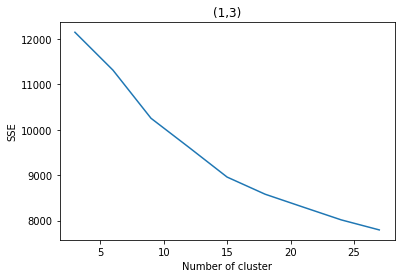

dict_keys([3, 6, 9, 12, 15, 18, 21, 24, 27])

In [145]:
# ngram_range를 (1,3) 으로 했을 때 각 중심으로부터의 거리 합
import matplotlib.pyplot as plt
sse = {}
for k in range(3,30,3):
    km = KMeans(n_clusters=k)
    #print('Number of cluster: {}'.format(k))
    #%time 
    km.fit(tfidf_matrix_1_3)
    sse[k] = km.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("(1,3)")
plt.show()
sse.keys()

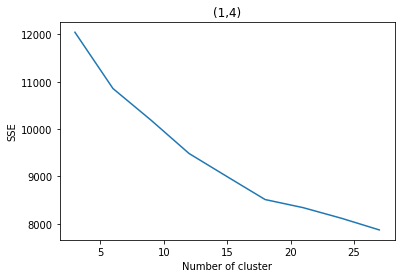

dict_keys([3, 6, 9, 12, 15, 18, 21, 24, 27])

In [147]:
# ngram_range 를 (1,4)로 했을 때 각 중심으로부터의 거리 합
import matplotlib.pyplot as plt
sse = {}
for k in range(3,30,3):
    km = KMeans(n_clusters=k)
    #print('Number of cluster: {}'.format(k))
    #%time 
    km.fit(tfidf_matrix_1_4)
    sse[k] = km.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("(1,4)")
plt.show()
sse.keys()

In [152]:
print(tfidf_matrix[0])
print(q_data['tags'][0])
print(tags[2278])

  (0, 2280)	0.42448640673614885
  (0, 703)	0.42448640673614885
  (0, 2278)	0.396460393447984
  (0, 1661)	0.2505448851883828
  (0, 701)	0.396460393447984
  (0, 2276)	0.2973113998436702
  (0, 2087)	0.133045785752169
  (0, 1657)	0.17609504833682665
  (0, 641)	0.1923262078952799
  (0, 2275)	0.2973113998436702
51 131 162 38
51 131 162


In [154]:
# clustering
from sklearn.cluster import KMeans

num_clusters = 12

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 24 s


In [155]:
# check the number of rows in each cluster
for i in range(12):
    print(f'Cluster {i} count : {clusters.count(i)}')

Cluster 0 count : 1405
Cluster 1 count : 2233
Cluster 2 count : 523
Cluster 3 count : 308
Cluster 4 count : 99
Cluster 5 count : 373
Cluster 6 count : 293
Cluster 7 count : 413
Cluster 8 count : 5752
Cluster 9 count : 617
Cluster 10 count : 738
Cluster 11 count : 768


In [160]:
q_data['cluster'] = clusters
q_data

,question_id,bundle_id,correct_answer,part,tags,cluster
0,0,0,0,1,51 131 162 38,8
1,1,1,1,1,131 36 81,8
2,2,2,0,1,131 101 162 92,8
3,3,3,0,1,131 149 162 29,8
4,4,4,3,1,131 5 162 38,8
...,...,...,...,...,...,...
13517,13518,13518,3,5,14,0
13518,13519,13519,3,5,8,10
13519,13520,13520,2,5,73,9
13520,13521,13521,0,5,125,8


## 3) Doc2vec -> Tags embedding

In [60]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [161]:
# 파일 열고 결측치 제거
q_data = pd.read_csv('C:\\Users\\lmj35\\Desktop\\벌쿠형 플젝\\riiid-test-answer-prediction\\questions.csv')
q_data.dropna(inplace=True)
q_data.reset_index(drop=True, inplace=True)
q_data

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13517,13518,13518,3,5,14
13518,13519,13519,3,5,8
13519,13520,13520,2,5,73
13520,13521,13521,0,5,125


In [63]:
# part를 문서명으로 / tags를 단어로 태깅작업
documents = [TaggedDocument(q_data['tags'][i], [q_data['part'][i]]) for i in range(len(q_data))]

In [64]:
documents[0:10]

[TaggedDocument(words='51 131 162 38', tags=[1]),
 TaggedDocument(words='131 36 81', tags=[1]),
 TaggedDocument(words='131 101 162 92', tags=[1]),
 TaggedDocument(words='131 149 162 29', tags=[1]),
 TaggedDocument(words='131 5 162 38', tags=[1]),
 TaggedDocument(words='131 149 162 81', tags=[1]),
 TaggedDocument(words='10 94 162 92', tags=[1]),
 TaggedDocument(words='61 110 162 29', tags=[1]),
 TaggedDocument(words='131 13 162 92', tags=[1]),
 TaggedDocument(words='10 164 81', tags=[1])]

In [83]:
# 태깅된 documents 학습
model = Doc2Vec(documents, vector_size = 100, window=5, min_count=1)
# 윈도우 사이즈 3으로 학습
model_win3 = Doc2Vec(documents, vector_size = 100, window=3, min_count=1)

In [84]:
print(documents[3][0])
print(model.infer_vector([documents[3][0]]))
print(documents[5][0])
print(model.infer_vector([documents[5][0]]))

131 149 162 29
[-2.6270412e-03 -1.0792059e-03  9.3084999e-04 -1.0814281e-03
  4.1094180e-03  1.9516131e-03  1.8456610e-03  1.4820450e-03
  1.2826187e-03 -1.4855709e-03 -4.7532194e-03 -4.2165429e-03
 -3.6454624e-03  3.9067073e-03  1.2520966e-03 -1.3451338e-03
  3.5184284e-03  1.6221553e-03  4.3798955e-03 -4.9770847e-03
  3.1570117e-03  7.4125308e-04  4.0287860e-03  3.9854511e-03
 -4.3788445e-03  2.3325491e-03 -3.1922986e-03  2.1768782e-04
  1.9622706e-03  7.6254341e-04 -2.7731147e-03 -5.8925874e-04
  2.5876446e-03 -6.8052375e-04 -8.0685632e-04  2.1180459e-03
  4.0041795e-03 -4.9294932e-03 -4.7228192e-03  1.7850221e-03
 -2.2115149e-03 -3.1646937e-03  4.3779975e-03 -3.5459723e-03
 -3.1307524e-03  2.4067394e-03  2.5968130e-03  3.0289565e-03
  2.7612064e-03 -1.4638466e-04  3.6611552e-03 -4.0281368e-03
  2.5094964e-04  4.3086540e-03  4.5415368e-03 -7.8518299e-04
 -3.0754022e-03 -3.2215563e-03 -4.2766812e-03 -5.0966738e-04
  2.0156598e-03 -2.3817583e-03  3.3218786e-03  2.1326719e-03
  4.52371

In [85]:
print(documents[3][0])
print(model_win3.infer_vector([documents[3][0]]))
print(documents[5][0])
print(model_win3.infer_vector([documents[5][0]]))

131 149 162 29
[-2.6270412e-03 -1.0792059e-03  9.3084999e-04 -1.0814281e-03
  4.1094180e-03  1.9516131e-03  1.8456610e-03  1.4820450e-03
  1.2826187e-03 -1.4855709e-03 -4.7532194e-03 -4.2165429e-03
 -3.6454624e-03  3.9067073e-03  1.2520966e-03 -1.3451338e-03
  3.5184284e-03  1.6221553e-03  4.3798955e-03 -4.9770847e-03
  3.1570117e-03  7.4125308e-04  4.0287860e-03  3.9854511e-03
 -4.3788445e-03  2.3325491e-03 -3.1922986e-03  2.1768782e-04
  1.9622706e-03  7.6254341e-04 -2.7731147e-03 -5.8925874e-04
  2.5876446e-03 -6.8052375e-04 -8.0685632e-04  2.1180459e-03
  4.0041795e-03 -4.9294932e-03 -4.7228192e-03  1.7850221e-03
 -2.2115149e-03 -3.1646937e-03  4.3779975e-03 -3.5459723e-03
 -3.1307524e-03  2.4067394e-03  2.5968130e-03  3.0289565e-03
  2.7612064e-03 -1.4638466e-04  3.6611552e-03 -4.0281368e-03
  2.5094964e-04  4.3086540e-03  4.5415368e-03 -7.8518299e-04
 -3.0754022e-03 -3.2215563e-03 -4.2766812e-03 -5.0966738e-04
  2.0156598e-03 -2.3817583e-03  3.3218786e-03  2.1326719e-03
  4.52371

In [86]:
tag_matrix = []
for i in range(len(q_data)):
    tag_matrix.append(model.infer_vector([documents[i][0]]))

In [87]:
q_data['tag_matrix'] = tag_matrix
q_data

,question_id,bundle_id,correct_answer,part,tags,tag_matrix
0,0,0,0,1,51 131 162 38,"[-0.00054638955, 0.00029392712, 0.0031707308, ..."
1,1,1,1,1,131 36 81,"[-0.0043460405, 0.0010119599, 0.0045370734, 0...."
2,2,2,0,1,131 101 162 92,"[-0.0004033665, -0.004040994, 0.0028690603, -0..."
3,3,3,0,1,131 149 162 29,"[-0.0026270412, -0.0010792059, 0.00093085, -0...."
4,4,4,3,1,131 5 162 38,"[0.0024230643, 0.0021292747, -0.0015728323, 0...."
...,...,...,...,...,...,...
13517,13518,13518,3,5,14,"[-0.0020479157, 0.0021694796, -0.0017835934, 0..."
13518,13519,13519,3,5,8,"[0.00448741, -0.0010939795, -0.0036249754, -0...."
13519,13520,13520,2,5,73,"[-0.00398229, 0.0031038164, 0.0011994485, 0.00..."
13520,13521,13521,0,5,125,"[-0.0047044735, 0.0034446698, 0.0022501594, -0..."
